#🚀 End-to-End Web Scraping Project
**💡 Goal**:
Web Scraping and Text Analysis of News Headlines
Project Overview


This project is an end-to-end web scraping and data analysis task where we extract news headlines from Hacker News, process the data, and perform text analysis using word frequency and word clouds. The goal is to automate data extraction, analyze trends in news, and visualize common topics.




In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


requests → Fetch web pages

beautifulsoup4 → Parse HTML

pandas → Store and manipulate data

matplotlib.pyplot → To plot visualizations

WordCloud → To generate a word cloud

#📌 Send a Request to the Website

If 200 → The request was successful ✅

If 403/529 → Access blocked

In [11]:
url = "https://news.ycombinator.com/"
headers = {"User-Agent": "Mozilla/5.0"}
page = requests.get(url, headers=headers)

soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify()[:1000])

<html lang="en" op="news">
 <head>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="news.css?ARl3b61MJZOkqfjyfvkd" rel="stylesheet" type="text/css"/>
  <link href="y18.svg" rel="icon"/>
  <link href="rss" rel="alternate" title="RSS" type="application/rss+xml"/>
  <title>
   Hacker News
  </title>
 </head>
 <body>
  <center>
   <table bgcolor="#f6f6ef" border="0" cellpadding="0" cellspacing="0" id="hnmain" width="85%">
    <tr>
     <td bgcolor="#ff6600">
      <table border="0" cellpadding="0" cellspacing="0" style="padding:2px" width="100%">
       <tr>
        <td style="width:18px;padding-right:4px">
         <a href="https://news.ycombinator.com">
          <img height="18" src="y18.svg" style="border:1px white solid; display:block" width="18"/>
         </a>
        </td>
        <td style="line-height:12pt; height:10px;">
         <span class="pagetop">
          <b class="hnname">
           <a hre

BeautifulSoup is used to parse the HTML content.

find_all("span", class_="titleline") extracts all news headlines from the page.

In [12]:
news_items = soup.find_all("span", class_="titleline")


for i, item in enumerate(news_items[:10], start=1):
    title = item.a.text
    link = item.a["href"]
    print(f"{i}. {title} - {link}")

1. Hotline for modern Apple systems - https://github.com/mierau/hotline
2. The PS2's backwards compatibility from the engineer who built it (2020) - https://freelansations.medium.com/the-story-of-the-ps2s-backwards-compatibility-from-the-engineer-who-built-it-ec39cf5a0353
3. Turner, Bird, Eratosthenes: An eternal burning thread - https://www.cambridge.org/core/journals/journal-of-functional-programming/article/turner-bird-eratosthenes-an-eternal-burning-thread/32E2EDF5D5EAEC95F13D313BC97B86F0
4. How does DeepSeek work: An inside look - https://codedoodles.substack.com/p/how-does-deepseek-work-an-in-depth
5. Ghostwriter – use the reMarkable2 as an interface to vision-LLMs - https://github.com/awwaiid/ghostwriter
6. U.K. orders Apple to let it spy on users' encrypted accounts - https://www.washingtonpost.com/technology/2025/02/07/apple-encryption-backdoor-uk/
7. Value-Based Deep RL Scales Predictably - https://arxiv.org/abs/2502.04327
8. VSCode's SSH agent is bananas - https://fly.io/blo

In [13]:
import pandas as pd

news_data = []
for item in news_items:
    title = item.a.text
    link = item.a["href"]
    news_data.append({"Title": title, "Link": link})

df = pd.DataFrame(news_data)

df.to_csv("hacker_news.csv", index=False)

print("✅ Data saved to hacker_news.csv successfully!")


✅ Data saved to hacker_news.csv successfully!


In [14]:
df = pd.read_csv("hacker_news.csv")

In [15]:
df

,Title,Link
0,Hotline for modern Apple systems,https://github.com/mierau/hotline
1,The PS2's backwards compatibility from the eng...,https://freelansations.medium.com/the-story-of...
2,"Turner, Bird, Eratosthenes: An eternal burning...",https://www.cambridge.org/core/journals/journa...
3,How does DeepSeek work: An inside look,https://codedoodles.substack.com/p/how-does-de...
4,Ghostwriter – use the reMarkable2 as an interf...,https://github.com/awwaiid/ghostwriter
5,U.K. orders Apple to let it spy on users' encr...,https://www.washingtonpost.com/technology/2025...
6,Value-Based Deep RL Scales Predictably,https://arxiv.org/abs/2502.04327
7,VSCode's SSH agent is bananas,https://fly.io/blog/vscode-ssh-wtf/
8,A brief history of code signing at Mozilla,https://hearsum.ca/posts/history-of-code-signi...
9,Asahi Linux lead developer Hector Martin resig...,https://lkml.org/lkml/2025/2/7/9


In [16]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = " ".join(df["Title"]).lower().split()

stop_words = {"the", "and", "of", "to", "in", "a", "for", "on", "with", "at", "as"}  # Add more if needed
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)

We combine all news headlines into a single text.

We create a word cloud to visualize the most frequently used words.

This helps understand trending topics on Hacker News.

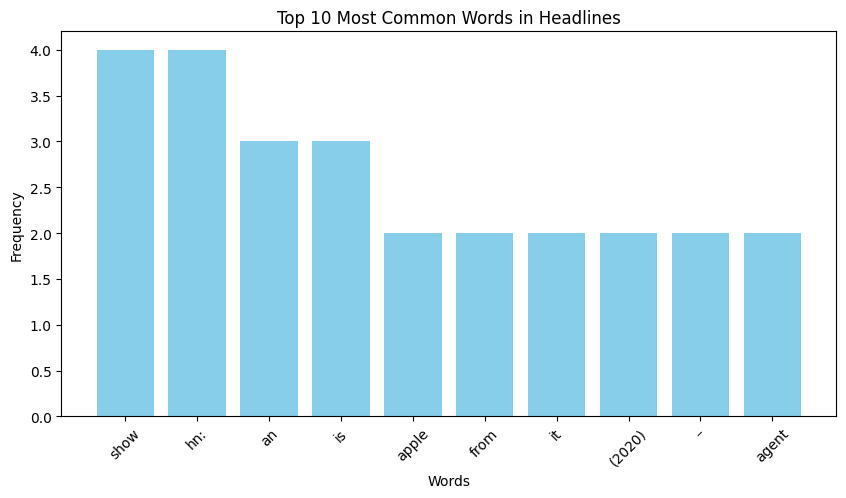

In [17]:
#  Plot the top 10 most common words
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words in Headlines")
plt.xticks(rotation=45)
plt.show()

A bar chart displaying the top 10 most frequently used words in Hacker News headlines. This helps identify common trends and popular discussion topics

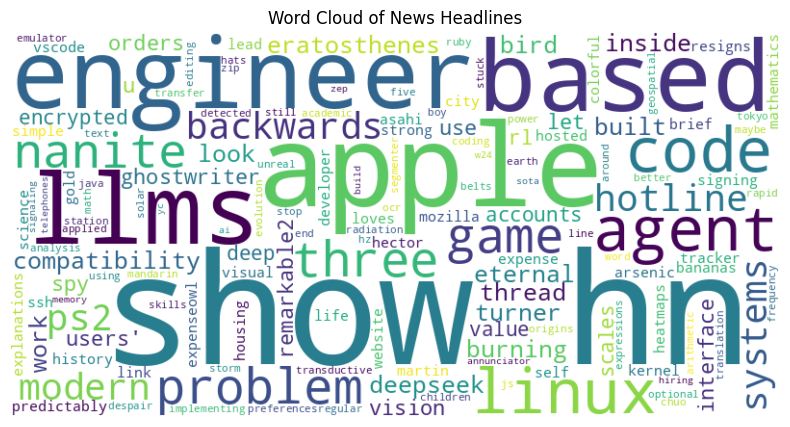

In [19]:
from wordcloud import WordCloud

text = " ".join(df["Title"]).lower()

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of News Headlines")
plt.show()


A Word Cloud where the most frequent words from the news headlines appear larger, helping identify trending topics visually.

